# Ultimate's Data Science Challenge

In [1]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

mpl.rcParams['axes.titlesize'] = 17    # font size for plot title
mpl.rcParams['axes.labelsize'] = 14    # font size for x-axis' and y-axis' label

## Part 1: Exploratory Data Analysis

The attached __<i>logins.json</i>__ file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [2]:
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


<font color='darkblue'>The logins file contains 93,142 login records from January 1, 1970 to April 13, 1970.</font>

In [4]:
'''Aggregate login counts based on 15-mins time intervals'''
logins.set_index('login_time', inplace=True)
logins['Count'] = 1
logins = logins.resample('15T').sum()

'''Add new columns'''
logins['Date'] = logins.index.date
logins['Month'] = logins.index.month
logins['Hour'] = logins.index.hour
logins['Weekday'] = logins.index.weekday

# map weekday to its' name
weekday_name = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
logins['Weekday'] = logins['Weekday'].map(weekday_name)

logins.head()

,Count,Date,Month,Hour,Weekday
login_time,,,,,
1970-01-01 20:00:00,2,1970-01-01,1,20,Thursday
1970-01-01 20:15:00,6,1970-01-01,1,20,Thursday
1970-01-01 20:30:00,9,1970-01-01,1,20,Thursday
1970-01-01 20:45:00,7,1970-01-01,1,20,Thursday
1970-01-01 21:00:00,1,1970-01-01,1,21,Thursday


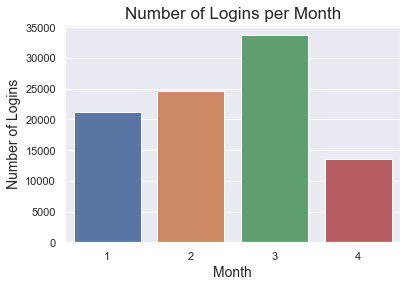

In [5]:
'''Plot number of logins per month'''
month_group = logins.groupby('Month')['Count'].sum().reset_index()
_ = sns.barplot('Month', 'Count', data=month_group)
plt.ylabel('Number of Logins')
plt.title('Number of Logins per Month')
plt.show()

<font color='darkblue'>March has the highest number of logins. April has the lowest number of logins.</font>

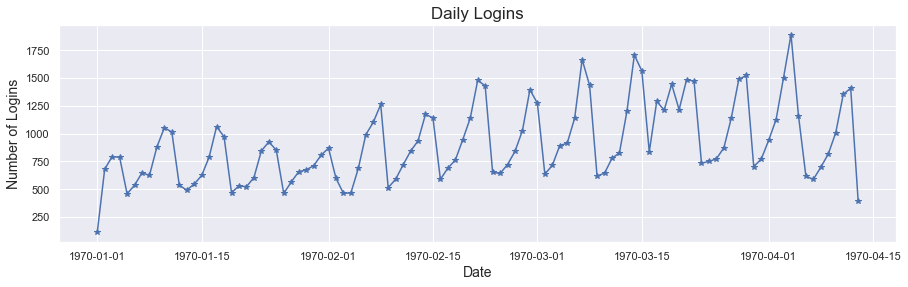

In [6]:
'''Plot number of logins per day'''
fig, ax = plt.subplots(figsize=(15, 4))
date_group = logins.groupby('Date')['Count'].sum()
_ = date_group.plot(ax=ax, marker='*')
plt.ylabel('Number of Logins')
plt.title('Daily Logins')
plt.show()

<font color='darkblue'>
    
- Jan. 1st has the lowest number of logins
- April 4th has the highest number of logins
- General trend for the time series seems to be increasing</font>

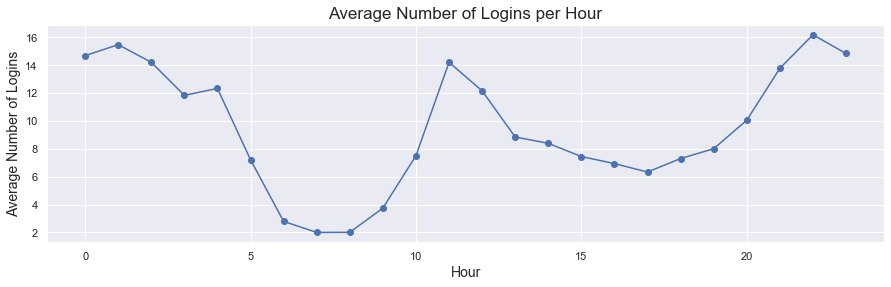

In [7]:
'''Plot avereage number of logins per hour'''
fig, ax = plt.subplots(figsize=(15, 4))
hour_group = logins.groupby('Hour')['Count'].mean()
_ = hour_group.plot(ax=ax, marker='o')
plt.ylabel('Average Number of Logins')
plt.title('Average Number of Logins per Hour')
plt.show()

<font color='darkblue'>The average number of logins is high
- between 11 am and 12 pm
- between 9 pm and 4 am

The average number of logins is low between 6 am and 9 am.
</font>

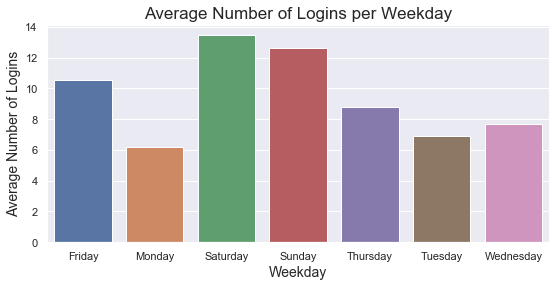

In [8]:
'''Plot average number of logins per weekday'''
weekday_group = logins.groupby('Weekday')['Count'].mean().reset_index()

fig, ax = plt.subplots(figsize=(9, 4))
_ = sns.barplot('Weekday', 'Count', data=weekday_group, ax=ax)
plt.ylabel('Average Number of Logins')
plt.title('Average Number of Logins per Weekday')
plt.show()

<font color='darkblue'>More logins on the weekend. Monday has the lowest number of logins.</font>

## Part 2: Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

   <font color='darkblue'>The key measure of success would be __<i>the number of cars passing the toll bridge between two cities</i>__. We can use this variable to compare the mean difference before and after the experiment and measure the success of the experiment.</font>

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

 a. How you will implement the experiment?
 
    <font color='darkblue'>Firstly, we will issue a toll tag for each Ultimate's car. The car that has the toll tag will not pay the toll fee. Secondly, we will keep track of the number of cars passing the toll bridge.</font>
 
 b. What statistical test(s) you will conduct to verify the significance of the observation?
 
    <font color='darkblue'>We will use t-test statistics to verify that the mean difference is significant for the number of cars passing the toll bridge before and after the experiment.</font>
 
 c. How you would interpret the results and provide recommendations to the city operations team along with any caveats?

      <font color='darkblue'>If the mean difference is significant for the number of cars passing the toll bridge __before and after the experiment__, the experiment is success if the mean of the number of cars passing the toll bridge after the experiment is higher than that of the before the experiment. Therefore, the city should continue to reimburse all toll costs. 
      
      Otherwise, the city should not continue to reimburse all toll costs.</font>

## Part 3: Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file __<i>ultimate_data_challenge.json</i>__. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Data description

- __city__: city this user signed up in
- __phone__: primary device for this user
- __signup_date__: date of account registration; in the form ‘YYYY MM DD’
- __last_trip_date__: the last time this user completed a trip; in the form ‘YYYY MM DD’
- __avg_dist__: the average distance in miles per trip taken in the first 30 days after signup
- __avg_rating_by_driver__: the rider’s average rating over all of their trips
- __avg_rating_of_driver__: the rider’s average rating of their drivers over all of their trips
- __surge_pct__: the percent of trips taken with surge multiplier > 1
- __avg_surge__: The average surge multiplier over all of this user’s trips
- __trips_in_first_30_days__: the number of trips this user took in the first 30 days after
signing up
- __ultimate_black_user__: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
- __weekday_pct__: the percent of the user’s trips occurring during a weekday

### Data Wrangling

In [9]:
# load data
df = pd.read_json('ultimate_data_challenge.json')

# drop collumn 'phone'
df.drop(['phone'], axis=1, inplace=True)

# convert date string to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9


In [10]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


#### Missing Values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   surge_pct               50000 non-null  float64       
 7   ultimate_black_user     50000 non-null  bool          
 8   weekday_pct             50000 non-null  float64       
 9   avg_dist                50000 non-null  float64       
 10  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(1)
memory usage: 3.9+ MB


In [12]:
# dictionary used to store information on column with missing values
df_dict = {'col_name': [],
           'null_count': [],
           'null_pct': []}

# iterate through each column
# save name of column that has missing values along with statistics
for col_name in df.columns:
    temp = df[col_name]
    if temp.hasnans == True:                                            # for column that has missing values
        null_count = len(df[temp.isnull()])                             # count number of missing values
        df_dict['col_name'].append(col_name)                            # save column's name
        df_dict['null_count'].append(null_count)                        # count number of missing values
        df_dict['null_pct'].append(round(null_count*100/len(temp), 2))  # percentage of missing values

# create data frame from dictionary
df_nulls = pd.DataFrame(df_dict)

print('Columns with missing values:')
df_nulls

Columns with missing values:


,col_name,null_count,null_pct
0,avg_rating_of_driver,8122,16.24
1,avg_rating_by_driver,201,0.40


#### New Columns

- __Months in Active__ = the difference between last_trip_date and signup_date in months
- __avg_rating_by_driver_class__ and __avg_rating_of_driver_class__
  - A if average rating is between 4 and 5
  - B if average rating is between 3 and 4
  - C if average rating is between 2 and 3
  - D if average rating is between 1 and 2
  - F if average rating is between 0 and 1

In [13]:
def assign_class(avg_rating):
    '''
    Assign class to average rating.
    
    Parameter:
    - avg_rating: average rating
    
    Return class for average rating.
    '''
    
    rating_class = {0: 'F', 1: 'D', 2: 'C', 3: 'B', 4: 'A', np.nan: ''}
    rating = math.floor(avg_rating) if avg_rating >= 0 else avg_rating
    
    return rating_class.get(rating)

In [14]:
# Months in Active
df['Months in Active'] = round((df['last_trip_date'] - df['signup_date']) / np.timedelta64(1, 'M'))
df['Months in Active'] = df['Months in Active'].astype(int)

# Assign class to average rating
df['avg_rating_by_driver_class'] = df['avg_rating_by_driver'].apply(assign_class)
df['avg_rating_of_driver_class'] = df['avg_rating_of_driver'].apply(assign_class)

#### Outliers

In [15]:
def boxplot(df_in, num_cols=3, figsize=(12, 10)):
    num_rows = math.ceil(len(df_in.columns) / num_cols)
    fig, axes = plt.subplots(figsize=figsize, nrows=num_rows, ncols=num_cols) 
    col = row = 0
    for col_name in df_in.columns:
        if num_rows == 1 and num_cols == 1:
            ax = axes
        elif num_rows == 1 and num_cols > 1:
            ax = axes[col]
        else:
            ax = axes[row, col]
        # draw boxplot
        _ = sns.boxplot(df_in[col_name], ax=ax, orient='v')
        ax.set_ylabel(col_name, fontsize=14)
        
        # set index for column and row
        col += 1
        if col == num_cols:
            col = 0        # reset column
            row = row + 1  # set to next row  
    
    plt.subplots_adjust(hspace=0.4, wspace=0.4)   
    plt.show()

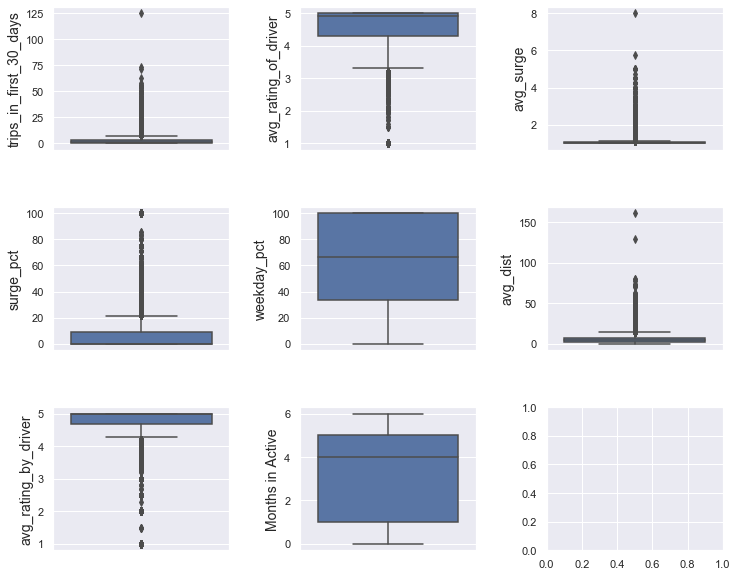

In [16]:
boxplot(df.select_dtypes(include=['number']))

<font color='darkblue'>Columns with outliers are:

- trips_in_first_30_days
- avg_rating_of_driver
- avg_surge
- surge_pct
- avg_dist
- avg_rating_by_driver
</font>

### Exploratory Data Analysis

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [17]:
def annotate_plot(ax, rotation=0, precision=0, pct_precision=0, y_offset=0, n=0, annotate=True):
    for p in ax.patches:
        if n == 0: h_adj = 1
        else: h_adj = 2
        
        x_offset = p.get_width() / 2
        format_str = ',.' + str(precision) + 'f'
        label = format(p.get_height(), format_str)
        x = p.get_x() + x_offset
        y = (p.get_height() + y_offset) / h_adj
        
        if annotate == True:  # annotate value in the middle of bar
            ax.annotate(label, (x,y), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', rotation=rotation)
        
        if n > 0:    # annotate percentage at the top of each bar
            pct_format_str = '.' + str(pct_precision) + 'f'
            ax.annotate(format(p.get_height()*100 / n, pct_format_str) + '%', 
               (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')

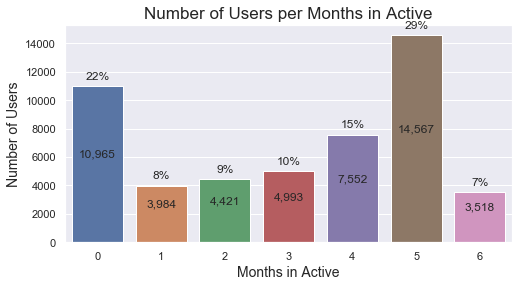

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))

month_group = df.groupby('Months in Active')['Months in Active'].count()
_ = sns.barplot(month_group.index, month_group, ax=ax)
annotate_plot(ax, n=month_group.sum())
plt.ylabel('Number of Users')
plt.title('Number of Users per Months in Active')
plt.show()

<font color='darkblue'>

- Only 7% of the observed users were retained (Months in Active = 6).
- Most users stayed active for 5 months or less than a month (Months in Active = 0).</font>

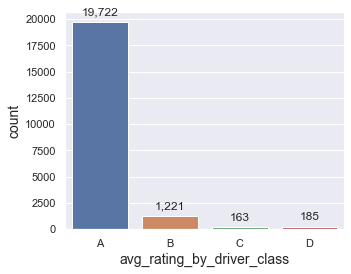

In [19]:
fig, ax = plt.subplots(figsize=(5, 4))
_ = sns.countplot(df['avg_rating_by_driver_class'], ax=ax)
annotate_plot(ax)
plt.show()

<font color='darkblue'>Most average ratings by driver are between 4 and 5 (class A).</font>

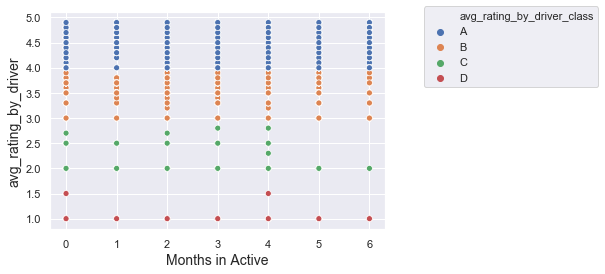

In [20]:
_ = sns.scatterplot('Months in Active', 'avg_rating_by_driver', data=df, hue='avg_rating_by_driver_class')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

<font color='darkblue'>

- There is not a strong linear relationship between average rating by driver and months in active.
- Most riders, regardless of months in active, gave ratings between 3 and 5 for their overall trips.
- The riders, who stayed active for less than four months, gave more ratings between 0 and 3 compared to the riders who stayed active for five or six months.</font>

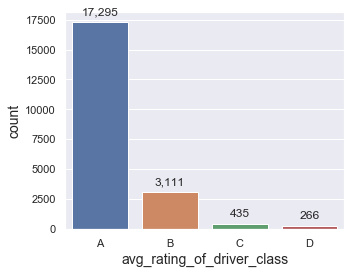

In [21]:
fig, ax = plt.subplots(figsize=(5, 4))
_ = sns.countplot(df['avg_rating_of_driver_class'], ax=ax)
annotate_plot(ax)
plt.show()

<font color='darkblue'>Most average ratings of driver are between 4 and 5 (class A).</font>

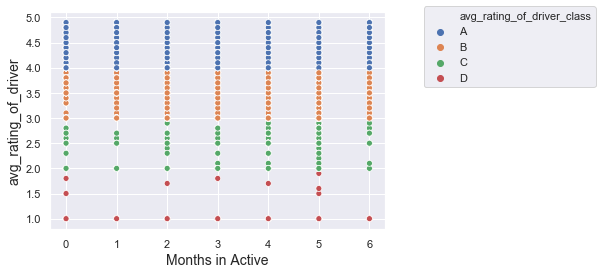

In [22]:
_ = sns.scatterplot('Months in Active', 'avg_rating_of_driver', data=df, hue='avg_rating_of_driver_class')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

<font color='darkblue'>

- There is not a strong linear relationship between average rating of driver and months in active.
- Most riders, regardless of months in active, gave ratings between 3 and 5 for their drivers.</font>

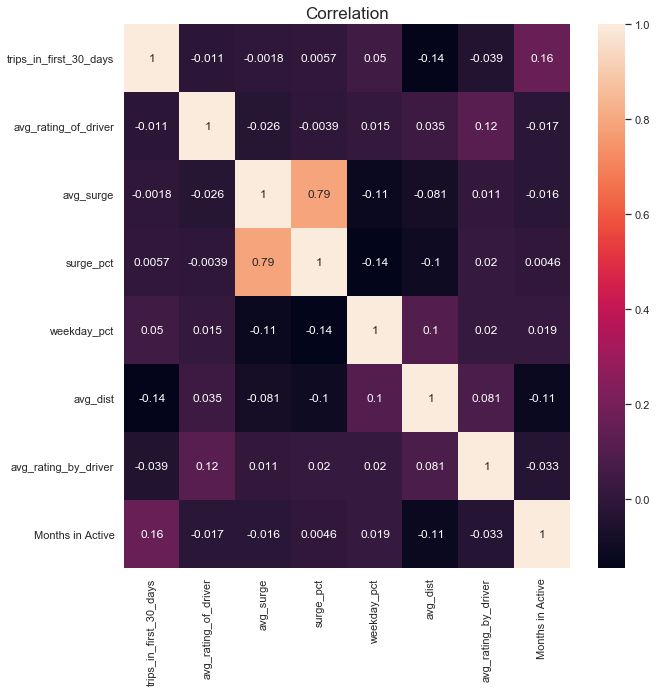

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, ax=ax)
plt.title('Correlation')
plt.show()

<font color='darkblue'>

- There is not a strong correlation between __Months in Active__ and other variables.
- Since __avg_surge__ and __surge_pct__ are highly correlated, __surge_pct__ is not used as a predictor.</font>

### Predictive Models

Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

<font color='darkblue'>Since the dataset contains outliers and missing values, xgboost model is selected as a predictived model because it works well with outliers and missing values.</font>

In [24]:
from sklearn.model_selection import train_test_split

y = df['Months in Active']
X = df.drop(['surge_pct', 'city', 'signup_date', 'last_trip_date',
             'avg_rating_by_driver_class', 'avg_rating_of_driver_class', 'Months in Active'], axis=1)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

estimator = XGBRegressor(objective='reg:squarederror', nthread=4, seed=42)

parameters = {'max_depth': [3, 4, 5],
              'n_estimators': [10, 20, 30],
              'learning_rate': [0.05, 0.07, 0.5],
              'gamma': [0.01, 0.05, 0.08], 
              'eta': [0.3, 0.4, 0.5]}

grid_search = GridSearchCV(estimator=estimator, param_grid=parameters,
                           n_jobs=10, cv=10, verbose=True)

grid_search.fit(X_train, y_train)
predicts = grid_search.predict(X_test)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    8.9s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   33.7s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  3.2min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:  4.6min
[Parallel(n_jobs=10)]: Done 2430 out of 2430 | elapsed:  6.2min finished


In [26]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0.01,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=30,
             n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             silent=None, subsample=1, verbosity=1)

#### Performance Metrics

1. __Mean Absolute Error (MAE)__
 - The average of the absolute differences between predictions and actual values.
 - Gives an idea of the magnitude of the error, but no idea of the direction (e.g. overfitting or underfitting).


2. __Mean Squared Error (MSE)__
 - Provides a gross idea of the magnitude of error.
 - Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation. This is called the Root Mean Squared Error (or RMSE).


3. __R-Squared__
 - Provides an indication of the goodness of fit of a set of predictions to the actual values.
 - Value ranges between 0 and 1 for no-fit and perfect fit respectively.

In [27]:
from sklearn import metrics 

mse = metrics.mean_squared_error(y_test, predicts)

print('Mean Absolute Error: %f' % metrics.mean_absolute_error(y_test, predicts))
print('Mean Squared Error: %f' % mse)
print('Root Mean Squared Error: %f' % np.sqrt(mse))
print('R-Squared: %f' % metrics.r2_score(y_test, predicts))

Mean Absolute Error: 1.104366
Mean Squared Error: 1.993700
Root Mean Squared Error: 1.411985
R-Squared: 0.537381


<font color='darkblue'>The model explains 53.7% of the variations in the dataset.</font>

In [28]:
print('Predictors:')
list(X.columns)

Predictors:


['trips_in_first_30_days',
 'avg_rating_of_driver',
 'avg_surge',
 'ultimate_black_user',
 'weekday_pct',
 'avg_dist',
 'avg_rating_by_driver']

<font color='darkblue'>Target variable: __Months in Active__</font>

### Managerial Implication

Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

<font color='darkblue'>To improve rider retention, Ultimate's management team should run several promotional campaigns throughout the year and measure the success of each campaign. Then, the management team can use the result of the previous campaign to develop strategies for rider retention.</font>